In [107]:
import pandas as pd
from IPython.display import display, HTML
%load_ext autoreload
%autoreload 2

import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
csv_file = open("uaScoresDataFrame.csv")
scores = pd.read_csv(csv_file)
scores = scores.drop('id', axis=1)
scores = scores.drop('Venture Capital', axis=1)

In [109]:
def check_zero(dataset):
    invalid_rows = []
    for element in dataset.columns.tolist():
        invalid = dataset[dataset[element] == 0.0]
        invalid_rows.append(invalid[['UA_Name','UA_Country']])
    df = pd.concat(invalid_rows).reset_index(drop=True).value_counts()
    return df
results = check_zero(scores).to_frame().reset_index().rename(columns={0:"number"})
print(results)

                       UA_Name               UA_Country  number
0                      Andorra                  Andorra       6
1                    Gibraltar                Gibraltar       5
2                      Managua                Nicaragua       3
3                     Tashkent               Uzbekistan       3
4                  Belize City                   Belize       3
5                       Panama                   Panama       3
6                    Palo Alto               California       2
7                       La Paz                  Bolivia       2
8                     Portland                    Maine       2
9                       Havana                     Cuba       2
10                     Fukuoka                    Japan       2
11                    San Juan              Puerto Rico       2
12                     Bozeman                  Montana       2
13                   Baltimore                 Maryland       2
14                    Valletta          

In [110]:
scores = scores[(scores != 0).all(1)]

In [111]:
weights_data = {
    'Housing' : 1.5,
    'Cost of Living' : 1.5,
    'Startups' : 0.5,
    'Business Freedom' : 0.8,
    'Safety' : 1.5,
    'Healthcare' : 1.5,
    'Education' : 0.5,
    'Travel Connectivity' : 1.5,
}

weights_vector = pd.Series(0.0, index=scores.columns[3:-1])
for i in range(len(weights_vector)):
    row_name = weights_vector.index[i]
    weights_vector[i] = weights_data.get(row_name, 1)

In [112]:
summable_values = list(scores)
if 'Naive Sum' in summable_values:
    summable_values.remove('Naive Sum')
weighted_scores = scores.copy()
weighted_scores = weighted_scores * weights_vector
scores['Naive Sum'] = weighted_scores[summable_values].sum(numeric_only=True, axis=1)

In [113]:
# scores['Naive Sum']
# better, worse

midpoint = scores['Naive Sum'].quantile()
scores['Label'] = ''
scores.loc[scores['Naive Sum'] < midpoint, 'Label'] = 'worse'
scores.loc[scores['Naive Sum'] >= midpoint, 'Label'] = 'better'
scores.drop(labels=['Startups', 'Business Freedom', 'Tolerance', 'Outdoors'], axis=1, inplace=True)
#scores_to_plot = scores[['Housing', 'Cost of Living', 'Safety', 'Healthcare', 'Travel Connectivity', 'Label']]
scores_to_plot = scores[['Commute', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture', 'Label']]

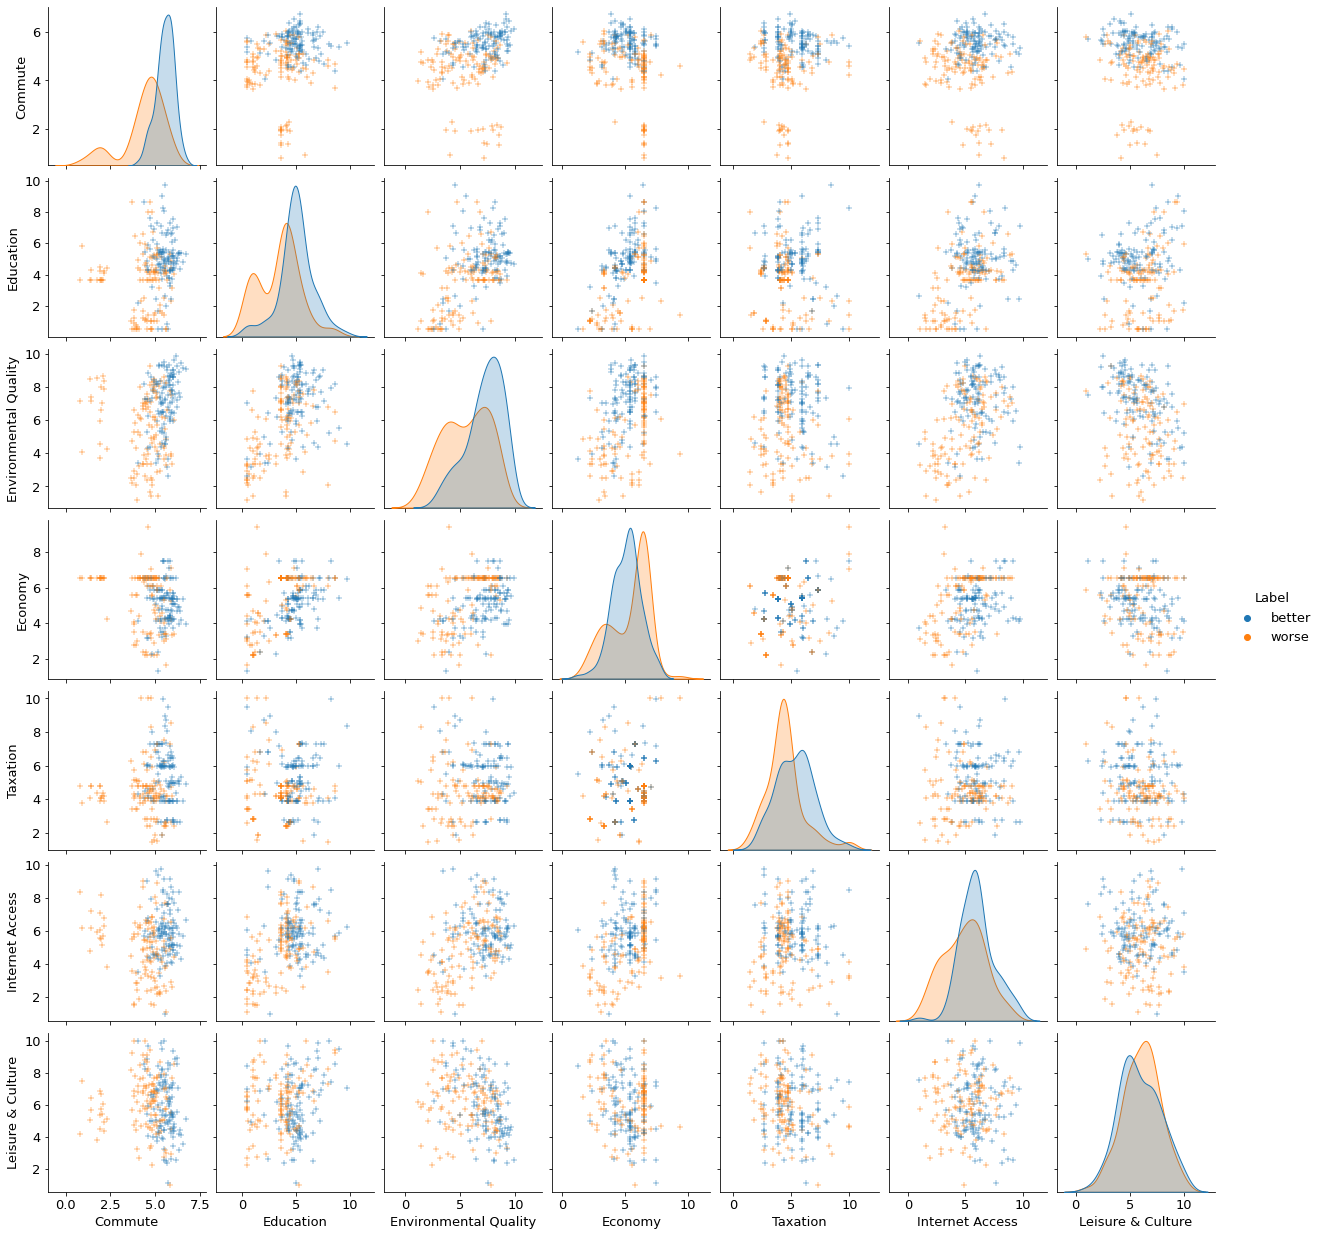

In [114]:
import seaborn as sns

sns.pairplot(scores_to_plot, hue='Label', markers='+')

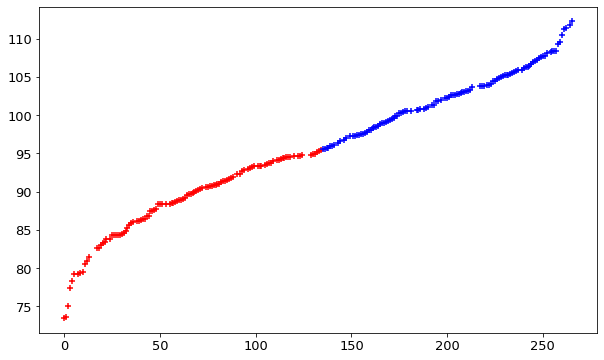

In [115]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
vals = scores['Naive Sum'].sort_values()
colors = np.where(vals >= midpoint, 'b', 'r')
ax.scatter(scores.index, vals, c=colors, marker='+')

In [116]:
from Modules.dataprocessing import ProcessingData
ProcessingData.normalize(scores)
a, b = ProcessingData.prepare_data(scores)

preview_table = pd.concat([a.head(), b.head()])

FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = fom, THRESHOLD = 70


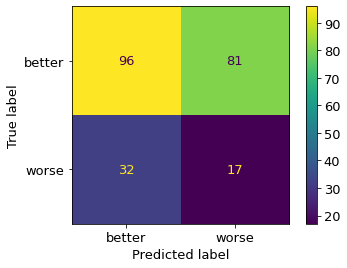

 > accuracy: 78.3%
 > recall: 85.0%
 > specificity: 71.7%
 > precision: 75.0%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = mom, THRESHOLD = 70


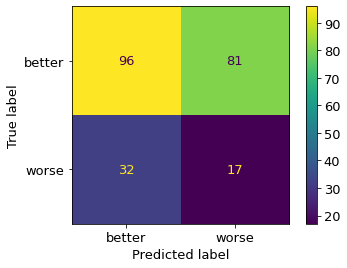

 > accuracy: 78.3%
 > recall: 85.0%
 > specificity: 71.7%
 > precision: 75.0%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = lom, THRESHOLD = 70


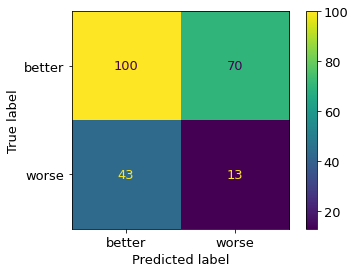

 > accuracy: 75.2%
 > recall: 88.5%
 > specificity: 61.9%
 > precision: 69.9%
----------------------------------------------------------------------------------
FOR NORM = ZadehNorm, DEFUZZIFICATION METHOD = centroid, THRESHOLD = 70


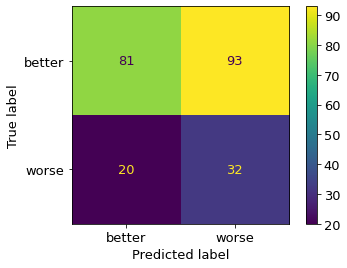

 > accuracy: 77.0%
 > recall: 71.7%
 > specificity: 82.3%
 > precision: 80.2%
----------------------------------------------------------------------------------
FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = fom, THRESHOLD = 70


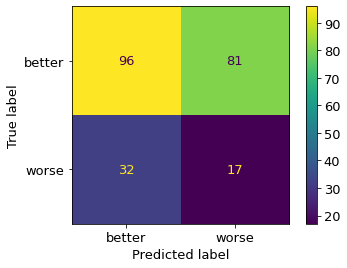

 > accuracy: 78.3%
 > recall: 85.0%
 > specificity: 71.7%
 > precision: 75.0%
----------------------------------------------------------------------------------
FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = mom, THRESHOLD = 70


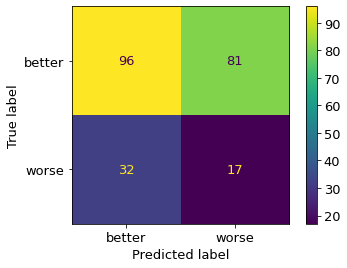

 > accuracy: 78.3%
 > recall: 85.0%
 > specificity: 71.7%
 > precision: 75.0%
----------------------------------------------------------------------------------
FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = lom, THRESHOLD = 70


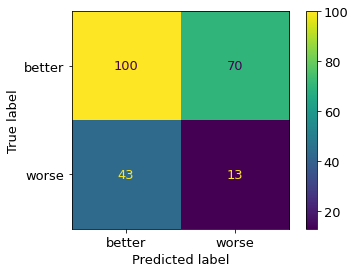

 > accuracy: 75.2%
 > recall: 88.5%
 > specificity: 61.9%
 > precision: 69.9%
----------------------------------------------------------------------------------
FOR NORM = ExtendedMangerNorm, DEFUZZIFICATION METHOD = centroid, THRESHOLD = 70


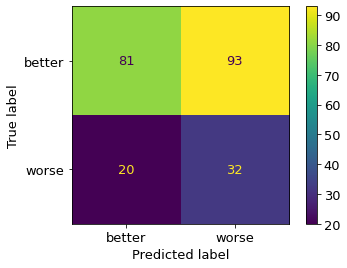

 > accuracy: 77.0%
 > recall: 71.7%
 > specificity: 82.3%
 > precision: 80.2%
----------------------------------------------------------------------------------


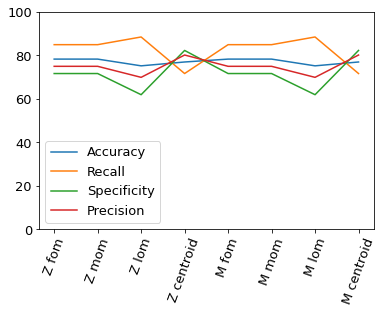

In [164]:
from itertools import product
import Modules.fuzzytesting as test
from Modules.fuzzytesting import FuzzyTest
import warnings
warnings.filterwarnings("ignore")
importlib.reload(test)
import Modules.fuzzysys as fsys
from Modules.norms import ZadehNorm
from Modules.membership_functions import TriangularFunction, TrapezoidalFunction
importlib.reload(fsys)
import Modules.rule as rule
from Modules.rule import RuleCondition as R
importlib.reload(rule)

from Modules.norms import ZadehNorm, ExtendedMangerNorm

Bad = 'Bad'
Average = 'Average'
Good = 'Good'

fuzzy = fsys.FuzzySystem()
fuzzy.add_antecedent('Housing', Bad, TrapezoidalFunction(0, 0, 0.3, 0.55))
fuzzy.add_antecedent('Housing', Average, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Housing', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Cost of Living', Bad, TrapezoidalFunction(0, 0, 0.25, 0.47))
fuzzy.add_antecedent('Cost of Living', Average, TriangularFunction(0.4, 0.55, 0.7))
fuzzy.add_antecedent('Cost of Living', Good, TrapezoidalFunction(0.6, 0.75, 1, 1))

fuzzy.add_antecedent('Safety', Bad, TrapezoidalFunction(0, 0, 0.3, 0.6))
fuzzy.add_antecedent('Safety', Average, TriangularFunction(0.5, 0.6, 0.7))
fuzzy.add_antecedent('Safety', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Healthcare', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Healthcare', Average, TriangularFunction(0.4, 0.6, 0.8))
fuzzy.add_antecedent('Healthcare', Good, TrapezoidalFunction(0.7, 0.85, 1, 1))

fuzzy.add_antecedent('Travel Connectivity', Bad, TrapezoidalFunction(0, 0, 0.14, 0.2))
fuzzy.add_antecedent('Travel Connectivity', Average, TrapezoidalFunction(0.15, 0.25, 0.33, 0.4))
fuzzy.add_antecedent('Travel Connectivity', Good, TrapezoidalFunction(0.35, 0.5, 1, 1))

fuzzy.add_antecedent('Commute', Bad, TrapezoidalFunction(0, 0, 0.46, 0.7))
fuzzy.add_antecedent('Commute', Average, TrapezoidalFunction(0.6, 0.67, 0.74, 0.8))
fuzzy.add_antecedent('Commute', Good, TrapezoidalFunction(0.7, 0.8, 1, 1))

fuzzy.add_antecedent('Education', Bad, TrapezoidalFunction(0, 0, 0.2, 0.4))
fuzzy.add_antecedent('Education', Average, TriangularFunction(0.3, 0.42, 0.5))
fuzzy.add_antecedent('Education', Good, TrapezoidalFunction(0.4, 0.7, 1, 1))

fuzzy.add_antecedent('Environmental Quality', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Environmental Quality', Average, TriangularFunction(0.45, 0.52, 0.7))
fuzzy.add_antecedent('Environmental Quality', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_antecedent('Economy', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Economy', Average, TriangularFunction(0.4, 0.5, 0.6))
fuzzy.add_antecedent('Economy', Good, TrapezoidalFunction(0.5, 0.75, 1, 1))

fuzzy.add_antecedent('Taxation', Bad, TrapezoidalFunction(0, 0, 0.26, 0.4))
fuzzy.add_antecedent('Taxation', Average, TrapezoidalFunction(0.3, 0.37, 0.44, 0.5))
fuzzy.add_antecedent('Taxation', Good, TrapezoidalFunction(0.4, 0.6, 1, 1))

fuzzy.add_antecedent('Internet Access', Bad, TrapezoidalFunction(0, 0, 0.2, 0.4))
fuzzy.add_antecedent('Internet Access', Average, TriangularFunction(0.3, 0.45, 0.6))
fuzzy.add_antecedent('Internet Access', Good, TrapezoidalFunction(0.5, 0.75, 1, 1))

fuzzy.add_antecedent('Leisure & Culture', Bad, TrapezoidalFunction(0, 0, 0.25, 0.5))
fuzzy.add_antecedent('Leisure & Culture', Average, TriangularFunction(0.4, 0.52, 0.7))
fuzzy.add_antecedent('Leisure & Culture', Good, TrapezoidalFunction(0.6, 0.8, 1, 1))

fuzzy.add_rule((R('Housing', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Healthcare', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Housing', Good) & R('Safety', Good) & R('Healthcare', Good)) | (R('Housing', Good) & R('Safety', Good) & R('Travel Connectivity', Good)) | (R('Housing', Good) & R('Healthcare', Good) & R('Travel Connectivity', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Travel Connectivity', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Housing', Good) & R('Cost of Living', Good) & R('Safety', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Safety', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Healthcare', Good) & R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Travel Connectivity', Good) & R('Healthcare', Good) & R('Safety', Good)), Good)
fuzzy.add_rule((R('Housing', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Healthcare', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Housing', Average) & R('Safety', Average) & R('Healthcare', Average)) | (R('Housing', Average) & R('Safety', Average) & R('Travel Connectivity', Average)) | (R('Housing', Average) & R('Healthcare', Average) & R('Travel Connectivity', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Travel Connectivity', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Housing', Average) & R('Cost of Living', Average) & R('Safety', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Safety', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Healthcare', Average) & R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Travel Connectivity', Average) & R('Healthcare', Average) & R('Safety', Average)), Average)
fuzzy.add_rule((R('Housing', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Healthcare', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Housing', Bad) & R('Safety', Bad) & R('Healthcare', Bad)) | (R('Housing', Bad) & R('Safety', Bad) & R('Travel Connectivity', Bad)) | (R('Housing', Bad) & R('Healthcare', Bad) & R('Travel Connectivity', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Travel Connectivity', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Housing', Bad) & R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Safety', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Healthcare', Bad) & R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Travel Connectivity', Bad) & R('Healthcare', Bad) & R('Safety', Bad)), Bad)
fuzzy.add_rule(((((R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & R('Safety', Good) & ~R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & R('Healthcare', Good) & ~R('Travel Connectivity', Good)) | (~R('Housing', Good) & ~R('Cost of Living', Good) & ~R('Safety', Good) & ~R('Healthcare', Good) & R('Travel Connectivity', Good))) & ((R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Leisure & Culture', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Internet Access', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Leisure & Culture', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) & (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Leisure & Culture', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Internet Access', Good) & R('Economy', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Internet Access', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Leisure & Culture', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Internet Access', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Internet Access', Good)) | (R('Commute', Good) & R('Education', Good) & R('Environmental Quality', Good) & R('Economy', Good) & R('Taxation', Good))))), Good)
fuzzy.add_rule(((((R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & R('Safety', Average) & ~R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & R('Healthcare', Average) & ~R('Travel Connectivity', Average)) | (~R('Housing', Average) & ~R('Cost of Living', Average) & ~R('Safety', Average) & ~R('Healthcare', Average) & R('Travel Connectivity', Average))) & ((R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Leisure & Culture', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Internet Access', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Leisure & Culture', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) & (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Leisure & Culture', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Internet Access', Average) & R('Economy', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Internet Access', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Leisure & Culture', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Internet Access', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Internet Access', Average)) | (R('Commute', Average) & R('Education', Average) & R('Environmental Quality', Average) & R('Economy', Average) & R('Taxation', Average))))), Average)
fuzzy.add_rule(((((R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & R('Safety', Bad) & ~R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & R('Healthcare', Bad) & ~R('Travel Connectivity', Bad)) | (~R('Housing', Bad) & ~R('Cost of Living', Bad) & ~R('Safety', Bad) & ~R('Healthcare', Bad) & R('Travel Connectivity', Bad))) & ((R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Leisure & Culture', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Internet Access', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Leisure & Culture', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) & (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Leisure & Culture', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Internet Access', Bad) & R('Economy', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Internet Access', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Leisure & Culture', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Internet Access', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Internet Access', Bad)) | (R('Commute', Bad) & R('Education', Bad) & R('Environmental Quality', Bad) & R('Economy', Bad) & R('Taxation', Bad))))), Bad)
fuzzy.add_rule((((R('Housing', Good) & R('Cost of Living', Good)) | (R('Housing', Good) & R('Safety', Good)) | (R('Housing', Good) & R('Healthcare', Good)) | (R('Housing', Good) & R('Travel Connectivity', Good)) | (R('Cost of Living', Good) & R('Safety', Good)) | (R('Cost of Living', Good) & R('Healthcare', Good)) | (R('Cost of Living', Good) & R('Travel Connectivity', Good)) | (R('Safety', Good) & R('Healthcare', Good)) | (R('Safety', Good) & R('Travel Connectivity', Good)) | (R('Healthcare', Good) & R('Travel Connectivity', Good))) & ((R('Commute', Good) & R('Eduaction', Good)) | (R('Commute', Good) | (R('Environmental Quality', Good)) | (R('Commute', Good) & R('Economy', Good)) | (R('Commute', Good) & R('Taxation', Good)) | (R('Commute', Good) & R('Internet Access', Good)) | (R('Commute', Good) & R('Leisure & Culture', Good)) | (R('Education', Good) & R('Environmental Quality', Good)) | (R('Education', Good) & R('Economy', Good)) | (R('Education', Good) & R('Taxation', Good)) | (R('Education', Good) & R('Internet Access', Good)) | (R('Education', Good) & R('Leisure & Culture', Good)) | (R('Environmental Quality', Good) & R('Economy', Good)) | (R('Environmental Quality', Good) & R('Taxation', Good)) | (R('Environmental Quality', Good) & R('Internet Access', Good)) | (R('Commute', Good) & R('Taxation', Good)) | (R('Environmental Quality', Good) & R('Leisure & Culture', Good)) | (R('Economy', Good) & R('Taxation', Good)) | (R('Economy', Good) & R('Internet Access', Good)) | (R('Commute', Good) & R('Taxation', Good)) | (R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Economy', Good) & R('Leisure & Culture', Good)) | (R('Taxation', Good) & R('Internet Access', Good)) | (R('Taxation', Good) & R('Leisure & Culture', Good)) | (R('Internet Access', Good) & R('Leisure & Culture', Good))))), Good)
fuzzy.add_rule((((R('Housing', Average) & R('Cost of Living', Average)) | (R('Housing', Average) & R('Safety', Average)) | (R('Housing', Average) & R('Healthcare', Average)) | (R('Housing', Average) & R('Travel Connectivity', Average)) | (R('Cost of Living', Average) & R('Safety', Average)) | (R('Cost of Living', Average) & R('Healthcare', Average)) | (R('Cost of Living', Average) & R('Travel Connectivity', Average)) | (R('Safety', Average) & R('Healthcare', Average)) | (R('Safety', Average) & R('Travel Connectivity', Average)) | (R('Healthcare', Average) & R('Travel Connectivity', Average))) & ((R('Commute', Average) & R('Eduaction', Average)) | (R('Commute', Average) | (R('Environmental Quality', Average)) | (R('Commute', Average) & R('Economy', Average)) | (R('Commute', Average) & R('Taxation', Average)) | (R('Commute', Average) & R('Internet Access', Average)) | (R('Commute', Average) & R('Leisure & Culture', Average)) | (R('Education', Average) & R('Environmental Quality', Average)) | (R('Education', Average) & R('Economy', Average)) | (R('Education', Average) & R('Taxation', Average)) | (R('Education', Average) & R('Internet Access', Average)) | (R('Education', Average) & R('Leisure & Culture', Average)) | (R('Environmental Quality', Average) & R('Economy', Average)) | (R('Environmental Quality', Average) & R('Taxation', Average)) | (R('Environmental Quality', Average) & R('Internet Access', Average)) | (R('Commute', Average) & R('Taxation', Average)) | (R('Environmental Quality', Average) & R('Leisure & Culture', Average)) | (R('Economy', Average) & R('Taxation', Average)) | (R('Economy', Average) & R('Internet Access', Average)) | (R('Commute', Average) & R('Taxation', Average)) | (R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Economy', Average) & R('Leisure & Culture', Average)) | (R('Taxation', Average) & R('Internet Access', Average)) | (R('Taxation', Average) & R('Leisure & Culture', Average)) | (R('Internet Access', Average) & R('Leisure & Culture', Average))))), Average)
fuzzy.add_rule((((R('Housing', Bad) & R('Cost of Living', Bad)) | (R('Housing', Bad) & R('Safety', Bad)) | (R('Housing', Bad) & R('Healthcare', Bad)) | (R('Housing', Bad) & R('Travel Connectivity', Bad)) | (R('Cost of Living', Bad) & R('Safety', Bad)) | (R('Cost of Living', Bad) & R('Healthcare', Bad)) | (R('Cost of Living', Bad) & R('Travel Connectivity', Bad)) | (R('Safety', Bad) & R('Healthcare', Bad)) | (R('Safety', Bad) & R('Travel Connectivity', Bad)) | (R('Healthcare', Bad) & R('Travel Connectivity', Bad))) & ((R('Commute', Bad) & R('Eduaction', Bad)) | (R('Commute', Bad) | (R('Environmental Quality', Bad)) | (R('Commute', Bad) & R('Economy', Bad)) | (R('Commute', Bad) & R('Taxation', Bad)) | (R('Commute', Bad) & R('Internet Access', Bad)) | (R('Commute', Bad) & R('Leisure & Culture', Bad)) | (R('Education', Bad) & R('Environmental Quality', Bad)) | (R('Education', Bad) & R('Economy', Bad)) | (R('Education', Bad) & R('Taxation', Bad)) | (R('Education', Bad) & R('Internet Access', Bad)) | (R('Education', Bad) & R('Leisure & Culture', Bad)) | (R('Environmental Quality', Bad) & R('Economy', Bad)) | (R('Environmental Quality', Bad) & R('Taxation', Bad)) | (R('Environmental Quality', Bad) & R('Internet Access', Bad)) | (R('Commute', Bad) & R('Taxation', Bad)) | (R('Environmental Quality', Bad) & R('Leisure & Culture', Bad)) | (R('Economy', Bad) & R('Taxation', Bad)) | (R('Economy', Bad) & R('Internet Access', Bad)) | (R('Commute', Bad) & R('Taxation', Bad)) | (R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Economy', Bad) & R('Leisure & Culture', Bad)) | (R('Taxation', Bad) & R('Internet Access', Bad)) | (R('Taxation', Bad) & R('Leisure & Culture', Bad)) | (R('Internet Access', Bad) & R('Leisure & Culture', Bad))))), Bad)
fuzzy.add_consequent(Bad, TriangularFunction(0, 0, 0.4))
fuzzy.add_consequent(Average, TriangularFunction(0.3, 0.5, 0.8))
fuzzy.add_consequent(Good, TriangularFunction(0.7, 1, 1))

#fuzzy.display_antecedents()
#fuzzy.display_consequents()
result = []
fuzzy_test = FuzzyTest(norm=ExtendedMangerNorm(), defuzzification_method='centroid')
for (norm, defuzz_method) in product([ZadehNorm, ExtendedMangerNorm], ['fom', 'mom', 'lom', 'centroid']):
    fuzzy_test = FuzzyTest(norm=norm(), defuzzification_method=defuzz_method)
    result.append(fuzzy_test.run(fuzzy, pd.concat([a, b]), show_confusion_matrix=True))
accuracy = []
recall = []
specificity = []
precision = []
for i in result:
    for j in i.keys():
        if j == 'accuracy':
            accuracy.append(i[j]*100)
        if j == 'recall':
            recall.append(i[j]*100)
        if j == 'specificity':
            specificity.append(i[j]*100)
        if j == 'precision':
            precision.append(i[j]*100)
fig,ax = plt.subplots()
ax.set(ylim=(0,100))
sns.lineplot(x=['Z fom','Z mom', 'Z lom', 'Z centroid','M fom','M mom', 'M lom', 'M centroid'], y=accuracy)
sns.lineplot(x=['Z fom','Z mom', 'Z lom', 'Z centroid','M fom','M mom', 'M lom', 'M centroid'], y=recall)
sns.lineplot(x=['Z fom','Z mom', 'Z lom', 'Z centroid','M fom','M mom', 'M lom', 'M centroid'], y=specificity)
sns.lineplot(x=['Z fom','Z mom', 'Z lom', 'Z centroid','M fom','M mom', 'M lom', 'M centroid'], y=precision)
ax.set_xticklabels(labels=['Z fom','Z mom', 'Z lom', 'Z centroid','M fom','M mom', 'M lom', 'M centroid'], rotation=70)
ax.legend(['Accuracy', 'Recall', 'Specificity', 'Precision'])

In [165]:
import Modules.knn as knn
import Modules.bayes as bayes
accuracy_k, precision_k, recall_k, specificity_k = knn.KNN.knn_for_every_row(a, b, 5, 5, 'Label')
accuracy_b, precision_b, recall_b, specificity_b = bayes.Bayes.bayes(a, b,'Label')


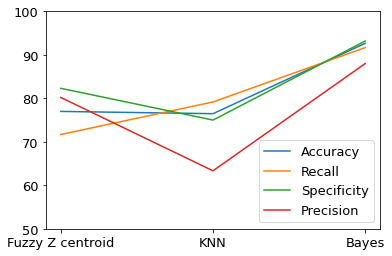

In [171]:
fig,ax = plt.subplots()
ax.set(ylim=(50,100))
sns.lineplot(x=['Fuzzy Z centroid', 'KNN', 'Bayes'], y=[accuracy[3], accuracy_k, accuracy_b])
sns.lineplot(x=['Fuzzy Z centroid', 'KNN', 'Bayes'], y=[recall[3], recall_k, recall_b])
sns.lineplot(x=['Fuzzy Z centroid', 'KNN', 'Bayes'], y=[specificity[3], specificity_k, specificity_b])
sns.lineplot(x=['Fuzzy Z centroid', 'KNN', 'Bayes'], y=[precision[3], precision_k, precision_b])
ax.legend(['Accuracy', 'Recall', 'Specificity', 'Precision'])